In [47]:
import os, glob
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

# EEG (Electroencephalography) Sample Analysis

In [48]:
eeg_data_dir = "data/samples/EEG"
eeg_sub_dirs = os.listdir(eeg_data_dir)
eeg_sub_dir_file_dict = dict()

for sub_dir in eeg_sub_dirs:
    eeg_sub_dir_file_dict[sub_dir] = glob.glob(os.path.join(eeg_data_dir, sub_dir, "**/*.mat"), recursive=True)

eeg_sub_dir_file_dict

{'VP001-EEG': ['data/samples/EEG\\VP001-EEG\\cnt_dsr.mat',
  'data/samples/EEG\\VP001-EEG\\cnt_nback.mat',
  'data/samples/EEG\\VP001-EEG\\cnt_wg.mat',
  'data/samples/EEG\\VP001-EEG\\mnt_dsr.mat',
  'data/samples/EEG\\VP001-EEG\\mnt_nback.mat',
  'data/samples/EEG\\VP001-EEG\\mnt_wg.mat',
  'data/samples/EEG\\VP001-EEG\\mrk_dsr.mat',
  'data/samples/EEG\\VP001-EEG\\mrk_nback.mat',
  'data/samples/EEG\\VP001-EEG\\mrk_wg.mat'],
 'VP002-EEG': ['data/samples/EEG\\VP002-EEG\\cnt_dsr.mat',
  'data/samples/EEG\\VP002-EEG\\cnt_nback.mat',
  'data/samples/EEG\\VP002-EEG\\cnt_wg.mat',
  'data/samples/EEG\\VP002-EEG\\mnt_dsr.mat',
  'data/samples/EEG\\VP002-EEG\\mnt_nback.mat',
  'data/samples/EEG\\VP002-EEG\\mnt_wg.mat',
  'data/samples/EEG\\VP002-EEG\\mrk_dsr.mat',
  'data/samples/EEG\\VP002-EEG\\mrk_nback.mat',
  'data/samples/EEG\\VP002-EEG\\mrk_wg.mat'],
 'VP003-EEG': ['data/samples/EEG\\VP003-EEG\\cnt_dsr.mat',
  'data/samples/EEG\\VP003-EEG\\cnt_nback.mat',
  'data/samples/EEG\\VP003-EEG\

In [49]:
sample_eeg = eeg_sub_dir_file_dict["VP001-EEG"]
sample_eeg_cnt = loadmat(sample_eeg[0])["cnt_dsr"]
sample_eeg_mrk = loadmat(sample_eeg[6])["mrk_dsr"]

In [50]:
print(f"EEG cnt keys: {sample_eeg_cnt.dtype}")
print(f"EEG mrk keys: {sample_eeg_mrk.dtype}")

EEG cnt keys: [('clab', 'O'), ('fs', 'O'), ('title', 'O'), ('x', 'O'), ('T', 'O'), ('yUnit', 'O')]
EEG mrk keys: [('time', 'O'), ('y', 'O'), ('className', 'O'), ('event', 'O')]


In [51]:
eeg_title = sample_eeg_cnt["title"][0][0][0]                                                # title
channel_eeg_labels = sample_eeg_cnt["clab"][0][0][0]                                    # channel labels
channel_eeg_labels = [ch.tolist()[0] for ch in channel_eeg_labels.tolist()]
cnt_eeg_sfreq = sample_eeg_cnt["fs"][0][0][0][0]                                        # sample frequency
cnt_eeg_signals = sample_eeg_cnt["x"][0][0]
cnt_eeg_event_onset = sample_eeg_mrk["time"][0][0].reshape(-1)                          # event / epoch onsets (millisecs)
cnt_eeg_event_classes = sample_eeg_mrk["event"][0][0][0][0][0].reshape(-1)              # classes
cnt_eeg_ohe_event_classes = sample_eeg_mrk["y"][0][0].T                                 # one hot encoded classes
cnt_eeg_class_names = sample_eeg_mrk["className"][0][0].reshape(-1)                     # class names
zeros = np.zeros_like(cnt_eeg_ohe_event_classes, dtype=int)
eeg_time_indices = ((cnt_eeg_event_onset / 1000) * cnt_eeg_sfreq).astype(int).tolist()  # time indices of each event onset
eeg_time_indices.append(cnt_eeg_signals.shape[0])                                       # to capture the last segment

In [52]:
eeg_title, cnt_eeg_signals.shape, len(eeg_time_indices)

('dsr', (268135, 30), 379)

In [53]:
eeg_start_times = eeg_time_indices[:-1]
eeg_end_times = eeg_time_indices[1:]

eeg_epochs = []
eeg_classes = []
for start, end, event_label in zip(eeg_start_times, eeg_end_times, cnt_eeg_event_classes):
    eeg_epochs.append(cnt_eeg_signals[start:end])
    eeg_classes.append(event_label)

print(f"Number of segments / epochs: {len(eeg_epochs)}")

Number of segments / epochs: 378


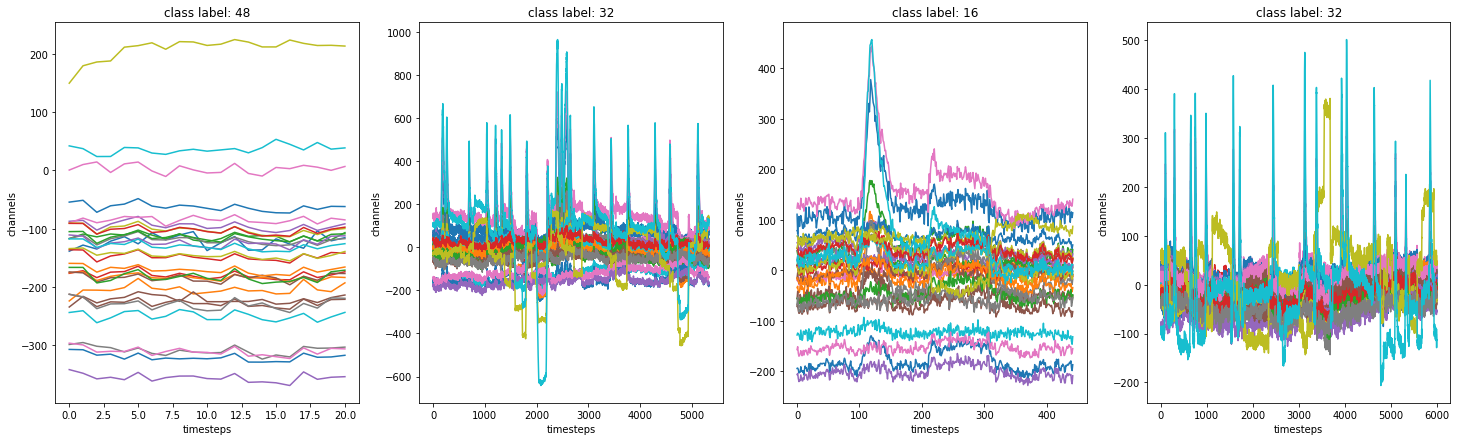

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(25, 7))
sample_idx = [0, 20, 13, -1]

for i, idx in enumerate(sample_idx):
    sample_epoch = eeg_epochs[idx]
    sample_class = eeg_classes[idx]
    for t in sample_epoch.T:
        axs[i].plot(t)
        axs[i].set_title(f"class label: {sample_class}")
        axs[i].set_xlabel("timesteps")
        axs[i].set_ylabel("channels")

# NRIS (Near-Infrared Spectroscopy) Sample Analysis

In [55]:
nirs_data_dir = "data/samples/NIRS"
nirs_sub_dirs = os.listdir(nirs_data_dir)
nirs_sub_dir_file_dict = dict()

for sub_dir in nirs_sub_dirs:
    nirs_sub_dir_file_dict[sub_dir] = glob.glob(os.path.join(nirs_data_dir, sub_dir, "**/*.mat"), recursive=True)

nirs_sub_dir_file_dict

{'VP001-NIRS': ['data/samples/NIRS\\VP001-NIRS\\cnt_dsr.mat',
  'data/samples/NIRS\\VP001-NIRS\\cnt_nback.mat',
  'data/samples/NIRS\\VP001-NIRS\\cnt_wg.mat',
  'data/samples/NIRS\\VP001-NIRS\\mnt_dsr.mat',
  'data/samples/NIRS\\VP001-NIRS\\mnt_nback.mat',
  'data/samples/NIRS\\VP001-NIRS\\mnt_wg.mat',
  'data/samples/NIRS\\VP001-NIRS\\mrk_dsr.mat',
  'data/samples/NIRS\\VP001-NIRS\\mrk_nback.mat',
  'data/samples/NIRS\\VP001-NIRS\\mrk_wg.mat'],
 'VP002-NIRS': ['data/samples/NIRS\\VP002-NIRS\\cnt_dsr.mat',
  'data/samples/NIRS\\VP002-NIRS\\cnt_nback.mat',
  'data/samples/NIRS\\VP002-NIRS\\cnt_wg.mat',
  'data/samples/NIRS\\VP002-NIRS\\mnt_dsr.mat',
  'data/samples/NIRS\\VP002-NIRS\\mnt_nback.mat',
  'data/samples/NIRS\\VP002-NIRS\\mnt_wg.mat',
  'data/samples/NIRS\\VP002-NIRS\\mrk_dsr.mat',
  'data/samples/NIRS\\VP002-NIRS\\mrk_nback.mat',
  'data/samples/NIRS\\VP002-NIRS\\mrk_wg.mat'],
 'VP003-NIRS': ['data/samples/NIRS\\VP003-NIRS\\cnt_dsr.mat',
  'data/samples/NIRS\\VP003-NIRS\\cnt_

In [56]:
sample_nirs = nirs_sub_dir_file_dict["VP001-NIRS"]
sample_nirs_cnt = loadmat(sample_nirs[1])["cnt_nback"]
nsample_nirs_mrk = loadmat(sample_nirs[7])["mrk_nback"]

In [57]:
print(f"NIRS cnt keys: {sample_nirs_cnt.dtype}")
print(f"NIRS mrk keys: {nsample_nirs_mrk.dtype}")

NIRS cnt keys: [('deoxy', 'O'), ('oxy', 'O')]
NIRS mrk keys: [('time', 'O'), ('y', 'O'), ('className', 'O'), ('event', 'O')]


In [58]:
nirs_cnt_oxy = sample_nirs_cnt['oxy'][0][0]
nirs_cnt_deoxy =sample_nirs_cnt ['deoxy'][0][0]

In [59]:
print(f"NIRS cnt oxy keys: {nirs_cnt_oxy.dtype}")
print(f"NIRS cnt deoxy keys: {nirs_cnt_deoxy.dtype}")

NIRS cnt oxy keys: [('fs', 'O'), ('nSources', 'O'), ('nDetectors', 'O'), ('multiplexing', 'O'), ('clab', 'O'), ('x', 'O'), ('wavelengths', 'O'), ('signal', 'O'), ('yUnit', 'O'), ('title', 'O'), ('file', 'O'), ('xInfo', 'O')]
NIRS cnt deoxy keys: [('fs', 'O'), ('nSources', 'O'), ('nDetectors', 'O'), ('multiplexing', 'O'), ('clab', 'O'), ('x', 'O'), ('wavelengths', 'O'), ('signal', 'O'), ('yUnit', 'O'), ('title', 'O'), ('file', 'O'), ('xInfo', 'O')]


### Oxygenated hemoglobin (oxy-Hb) data

In [60]:
nirs_oxy_title = nirs_cnt_oxy["title"][0][0][0]                                             # title
channel_nirs_labels = nirs_cnt_oxy["clab"][0][0][0]                                         # channel labels
channel_nirs_labels = [ch.tolist()[0] for ch in channel_nirs_labels.tolist()]
cnt_nirs_sfreq = nirs_cnt_oxy["fs"][0][0][0][0]                                             # sample frequency
cnt_nirs_signals = nirs_cnt_oxy["x"][0][0]
cnt_nirs_event_onset = nsample_nirs_mrk["time"][0][0].reshape(-1)                           # event / epoch onsets (millisecs)
cnt_nirs_event_classes = nsample_nirs_mrk["event"][0][0][0][0][0].reshape(-1)               # classes
cnt_nirs_ohe_event_classes = nsample_nirs_mrk["y"][0][0].T                                  # one hot encoded classes
cnt_nirs_class_names = nsample_nirs_mrk["className"][0][0].reshape(-1)                      # class names
zeros = np.zeros_like(cnt_nirs_ohe_event_classes, dtype=int)
nirs_time_indices = ((cnt_nirs_event_onset / 1000) * cnt_nirs_sfreq).astype(int).tolist()   # time indices of each event onset
nirs_time_indices.append(cnt_nirs_signals.shape[0])                                         # to capture the last segment

In [61]:
nirs_oxy_title, cnt_eeg_signals.shape, len(nirs_time_indices), cnt_nirs_ohe_event_classes.shape

('nback', (268135, 30), 28, (27, 3))

In [62]:
cnt_nirs_event_classes, cnt_nirs_class_names

(array([9, 8, 7, 8, 7, 9, 7, 9, 8, 8, 7, 9, 7, 9, 8, 9, 8, 7, 7, 9, 8, 9,
        8, 7, 8, 7, 9], dtype=uint8),
 array([array(['0-back session'], dtype='<U14'),
        array(['2-back session'], dtype='<U14'),
        array(['3-back session'], dtype='<U14')], dtype=object))

In [63]:
nirs_start_times = nirs_time_indices[:-1]
nirs_end_times = nirs_time_indices[1:]

nirs_epochs = []
nirs_classes = []
for start, end, event_label in zip(nirs_start_times, nirs_end_times, cnt_nirs_event_classes):
    nirs_epochs.append(cnt_nirs_signals[start:end])
    nirs_classes.append(event_label)

print(f"Number of segments / epochs: {len(nirs_epochs)}")

Number of segments / epochs: 27


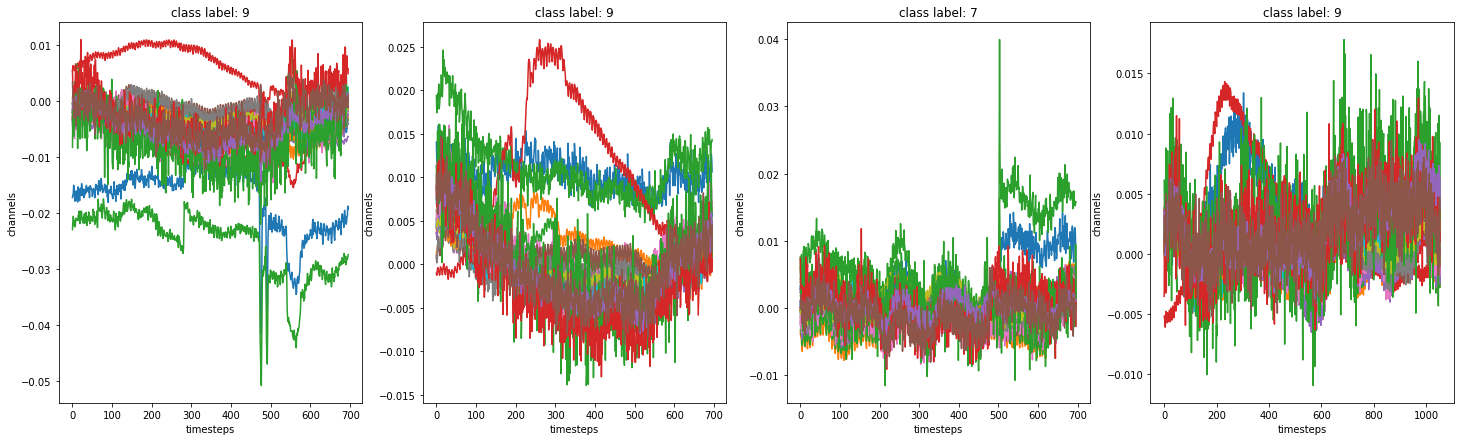

In [64]:
fig, axs = plt.subplots(1, 4, figsize=(25, 7))
sample_idx = [0, 5, 10, -1]

for i, idx in enumerate(sample_idx):
    sample_epoch = nirs_epochs[idx]
    sample_class = nirs_classes[idx]
    for t in sample_epoch.T:
        axs[i].plot(t)
        axs[i].set_title(f"class label: {sample_class}")
        axs[i].set_xlabel("timesteps")
        axs[i].set_ylabel("channels")

### Deoxygenated hemoglobin (deoxy-Hb) data

In [111]:
nirs_deoxy_title = nirs_cnt_deoxy["title"][0][0][0]                                         # title
channel_nirs_labels = nirs_cnt_deoxy["clab"][0][0][0]                                       # channel labels
channel_nirs_labels = [ch.tolist()[0] for ch in channel_nirs_labels.tolist()]
cnt_nirs_sfreq = nirs_cnt_deoxy["fs"][0][0][0][0]                                           # sample frequency
cnt_nirs_signals = nirs_cnt_deoxy["x"][0][0]
cnt_nirs_event_onset = nsample_nirs_mrk["time"][0][0].reshape(-1)                           # event / epoch onsets (millisecs)
cnt_nirs_event_classes = nsample_nirs_mrk["event"][0][0][0][0][0].reshape(-1)               # classes
cnt_nirs_ohe_event_classes = nsample_nirs_mrk["y"][0][0].T                                  # one hot encoded classes
cnt_nirs_class_names = nsample_nirs_mrk["className"][0][0].reshape(-1).tolist()                      # class names
zeros = np.zeros_like(cnt_nirs_ohe_event_classes, dtype=int)
nirs_time_indices = ((cnt_nirs_event_onset / 1000) * cnt_nirs_sfreq).astype(int).tolist()   # time indices of each event onset
nirs_time_indices.append(cnt_nirs_signals.shape[0])                                         # to capture the last segment

In [112]:
cnt_nirs_class_names = [i.tolist()[0] for i in cnt_nirs_class_names]
print(cnt_nirs_class_names)
idx = np.nonzero(cnt_nirs_ohe_event_classes[0])[0][0]
print("\n", cnt_nirs_class_names[idx])

['0-back session', '2-back session', '3-back session']

 3-back session


In [ ]:
nirs_deoxy_title, cnt_eeg_signals.shape, len(nirs_time_indices), cnt_nirs_ohe_event_classes.shape

('nback', (268135, 30), 28, (27, 3))

In [ ]:
cnt_nirs_event_classes, cnt_nirs_class_names

(array([9, 8, 7, 8, 7, 9, 7, 9, 8, 8, 7, 9, 7, 9, 8, 9, 8, 7, 7, 9, 8, 9,
        8, 7, 8, 7, 9], dtype=uint8),
 array([array(['0-back session'], dtype='<U14'),
        array(['2-back session'], dtype='<U14'),
        array(['3-back session'], dtype='<U14')], dtype=object))

In [ ]:
nirs_start_times = nirs_time_indices[:-1]
nirs_end_times = nirs_time_indices[1:]

nirs_epochs = []
nirs_classes = []
for start, end, event_label in zip(nirs_start_times, nirs_end_times, cnt_nirs_event_classes):
    nirs_epochs.append(cnt_nirs_signals[start:end])
    nirs_classes.append(event_label)

print(f"Number of segments / epochs: {len(nirs_epochs)}")

Number of segments / epochs: 27


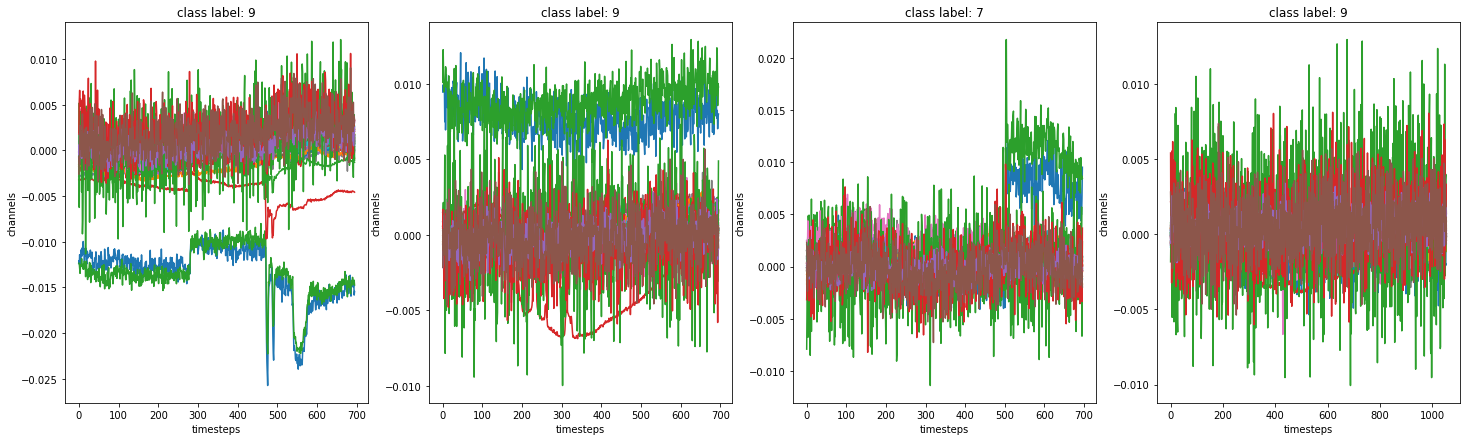

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 7))
sample_idx = [0, 5, 10, -1]

for i, idx in enumerate(sample_idx):
    sample_epoch = nirs_epochs[idx]
    sample_class = nirs_classes[idx]
    for t in sample_epoch.T:
        axs[i].plot(t)
        axs[i].set_title(f"class label: {sample_class}")
        axs[i].set_xlabel("timesteps")
        axs[i].set_ylabel("channels")